## 🧩 Notebook 10: Inference from Summary Statistics with SciPy

In [1]:
# Setup and Imports
import pandas as pd
import numpy as np
from pathlib import Path
import sys

# ✅ Setup path to use utils
PROJECT_ROOT = Path.cwd().parent
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

from utils.inference_utils import (
    compute_sem,
    confidence_interval,
    z_confidence_interval,
    manual_t_test,
    compute_sample_size,
    margin_of_error
)

from utils.viz_utils import (
    plot_confidence_interval,
    plot_residuals_vs_population,
    plot_multiple_confidence_intervals,
    save_and_show_plot
)

# Constants
EXPORT_PLOTS = Path("../exports/plots/10_inference_from_raw")
EXPORT_TABLES = Path("../exports/tables/10_inference_from_raw")
EXPORT_PLOTS.mkdir(parents=True, exist_ok=True)
EXPORT_TABLES.mkdir(parents=True, exist_ok=True)

## 🔹 Step 1: Define Synthetic Summary Statistics

In [2]:
# Simulating a typical summary from a survey or small study

mean = 72.5
std_dev = 10.4
n = 30
pop_mean = 70
pop_std = 9.5   # for z-based CI


## 🔹 Step 2: Compute SEM

In [3]:
# Compute SEM
sem = compute_sem(std_dev, n)
print(f"SEM: {sem:.3f}")

SEM: 1.899


## 🔹 Step 3: Compute Multiple Confidence Intervals

,Confidence_Level,CI_Low,CI_High
0,0.90,69.273746,75.726254
1,0.95,68.616576,76.383424
2,0.99,67.266253,77.733747


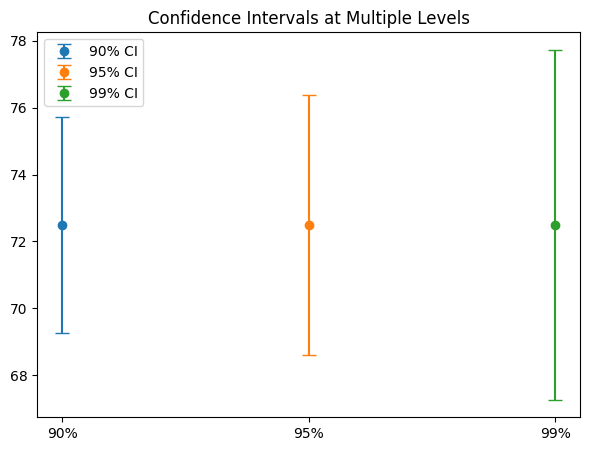

In [4]:
# Compute Multiple Confidence Intervals
confidence_levels = [0.90, 0.95, 0.99]
ci_results = {}
for level in confidence_levels:
    ci_results[level] = confidence_interval(mean, std_dev, n, confidence=level)

ci_df = pd.DataFrame(
    [(level, *bounds) for level, bounds in ci_results.items()],
    columns=["Confidence_Level", "CI_Low", "CI_High"]
)
ci_df.to_csv(EXPORT_TABLES / "confidence_intervals_multi.csv", index=False)
display(ci_df)

fig_multi_ci = plot_multiple_confidence_intervals(mean, ci_results)
save_and_show_plot(fig_multi_ci, EXPORT_PLOTS / "multi_ci_plot.png")

# Store default 95% CI separately for later use
ci_95 = ci_results[0.95]


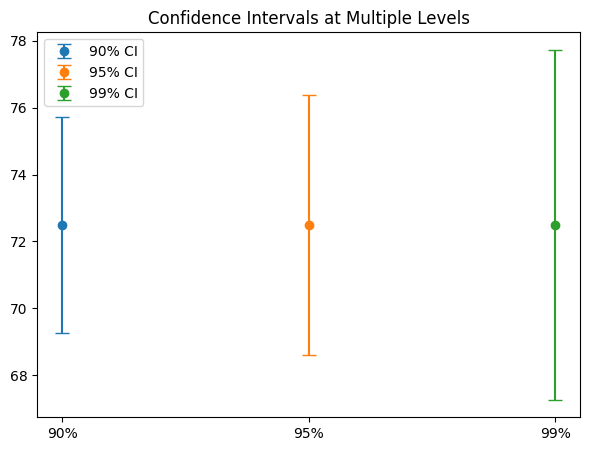

In [5]:
fig_multi_ci = plot_multiple_confidence_intervals(mean, ci_results)
save_and_show_plot(fig_multi_ci, EXPORT_PLOTS / "multi_ci_plot.png")

## 🔹 Step 4: Z-based Interval (Assume population std known)

In [6]:
# Z-based Interval (Assume population std known)
z_ci = z_confidence_interval(mean, pop_std, n)
print(f"95% Z-based CI (known pop std): {z_ci}")

95% Z-based CI (known pop std): (np.float64(69.1005311269374), np.float64(75.8994688730626))


## 🔹 Step 5: Manual t-test (vs population mean)

In [7]:
# Manual t-test (vs population mean)
t_stat, p_value = manual_t_test(mean, pop_mean, std_dev, n)
print(f"T-statistic: {t_stat:.3f}, p-value: {p_value:.4f}")

T-statistic: 1.317, p-value: 0.1983


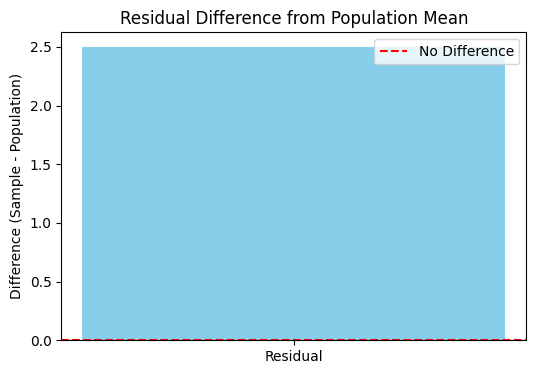

In [8]:
# Residual plot
residual = mean - pop_mean
fig_residuals = plot_residuals_vs_population(mean, pop_mean, residual)
save_and_show_plot(fig_residuals, EXPORT_PLOTS / "residual_vs_population.png")

## 🔹 Step 6: Margin of Error

In [9]:
# Margin of Error
moe = margin_of_error(std_dev, n)
print(f"Margin of Error (95% CI): {moe:.3f}")

Margin of Error (95% CI): 3.883


## 🔹 Step 7: Power Analysis

In [10]:
# Power Analysis
effect_size = abs(mean - pop_mean) / std_dev
required_n = compute_sample_size(effect_size)
print(f"Required sample size for 80% power: {required_n:.2f}")

Required sample size for 80% power: 137.76



## 🔹 Step 8: Save All Results

In [11]:
results_df = pd.DataFrame({
    "Metric": ["SEM", "CI_95_low", "CI_95_high", "Z_CI_low", "Z_CI_high",
               "T-statistic", "p-value", "Margin_of_Error", "Effect_Size", "Required_Sample_Size"],
    "Value": [sem, ci_95[0], ci_95[1], z_ci[0], z_ci[1],
              t_stat, p_value, moe, effect_size, required_n]
})
results_df.to_csv(EXPORT_TABLES / "summary_statistics_inference_extended.csv", index=False)
display(results_df)

,Metric,Value
0,SEM,1.898772
1,CI_95_low,68.616576
2,CI_95_high,76.383424
3,Z_CI_low,69.100531
4,Z_CI_high,75.899469
5,T-statistic,1.316641
6,p-value,0.198270
7,Margin_of_Error,3.883424
8,Effect_Size,0.240385
9,Required_Sample_Size,137.762309


## 🔹 Step 9: Confidence Interval Plot (95% CI)

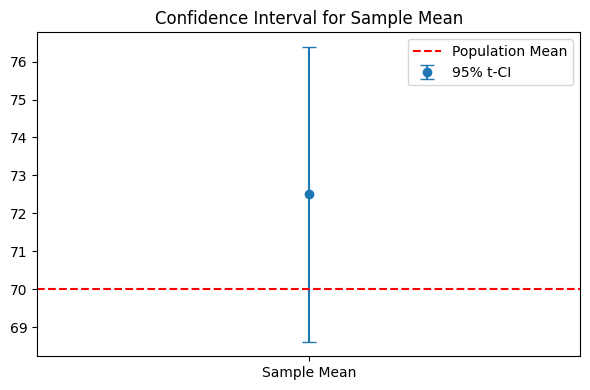

In [12]:
# Confidence Interval Plot (95% CI)
fig_ci = plot_confidence_interval(mean, ci_95, pop_mean=pop_mean)
save_and_show_plot(fig_ci, EXPORT_PLOTS / "ci_plot.png")

## 🧠 Key Takeaways
- You don’t need raw data to perform inferential statistics — summary values often suffice.
- Use SEM to estimate spread of means across samples.
- Construct confidence intervals using t or z-distributions.
- Perform a one-sample t-test manually using just mean, std, and n.
- Margin of error provides a helpful standalone bound, often used in surveys.
- Power analysis helps plan the required sample size for detecting effects.

## ✅ Summary
In this notebook, we:

- Used synthetic summary statistics (mean, std, n)
- Computed SEM, CI (multiple levels), Z-based CI
- Performed a one-sample t-test manually
- Calculated margin of error and performed power analysis
- Exported results and plots for visualization